In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [10]:
df = pd.read_csv('breast-cancer-wisconsin-data_data.csv')
print(df.columns)
from itertools import permutations
p = permutations(df.columns[1:], 2)
df['diagnosis'].replace('M', 1, inplace=True)
df['diagnosis'].replace('B', 0, inplace=True)


# for e in p:
#     plt.scatter(df[e[0]], df[e[1]], c=df['diagnosis'])
#     plt.title(f'{e[0]} {e[1]}')
#     plt.show()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [2]:
class Perceptron:
    def __init__(self, weights, bias, adaption_rate=0.01, n_epochs=100, adaption_method=None):
        self.ar = adaption_rate
        self.n_epochs = n_epochs
        self.activation_func = lambda arr: np.where(arr > 0, 1, 0)
        self.weights = weights
        self.bias = bias
        self.adaption_method = adaption_method

    def fit(self, X, y):
        # prepend 1 to X
        X = np.insert(X, 0, 1, axis=1) 
        # adjust w0
        self.weights[0] = -self.bias
        for _ in range(self.n_epochs):
            for idx, x_i in enumerate(X):
                y_hat = self.activation_func(np.dot(x_i, self.weights))
                # adapt weights
                if self.adaption_method is None:
                    if y_hat == 0 and y[idx] == 1:
                        self.weights += x_i
                    elif y_hat == 1 and y[idx] == 0:
                        self.weights -= x_i
                elif self.adaption_method == 'modified':
                    if y_hat == 0 and y[idx] == 1:
                        self.weights += self.ar*x_i
                    elif y_hat == 1 and y[idx] == 0:
                        self.weights -= self.ar*x_i
                elif self.adaption_method == 'delta':
                    delta = y[idx] - y_hat
                    self.weights += self.ar * delta * x_i
                

    def predict(self, X):
        # prepend 1 to X
        X = np.insert(X, 0, 1, axis=1)
        return self.activation_func(np.dot(X, self.weights))
                

# Splitting the data

In [11]:
X = df.iloc[:, 2:32]
y = df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
weights=np.random.rand(X.shape[1] + 1)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0
 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1
 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0
 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1
 0 0 1 1 0 1 1 0 0 0 0]


# Training the model using naive perceptron

In [152]:
p = Perceptron(weights, bias=1.5, adaption_method='delta')
p.fit(X_train, y_train)
y_pred = p.predict(X_test)
# print(y_pred)
# print(y_test)
# print(np.sum(y_pred == y_test) / len(y_test))

In [153]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.8596491228070176
Confusion Matrix:
[[74  0]
 [16 24]]
F1 Score: 0.7499999999999999


# Training the model using modified perceptron

In [160]:
p = Perceptron(weights, bias=.5, adaption_method='modified')
p.fit(X_train, y_train)
y_pred = p.predict(X_test)

In [161]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.9122807017543859
Confusion Matrix:
[[74  0]
 [10 30]]
F1 Score: 0.8571428571428571


# Training the model using delta rule

In [162]:
p = Perceptron(weights=weights, bias=1.5, adaption_method='delta')
p.fit(X_train, y_train)
y_pred = p.predict(X_test)

In [163]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.9122807017543859
Confusion Matrix:
[[74  0]
 [10 30]]
F1 Score: 0.8571428571428571


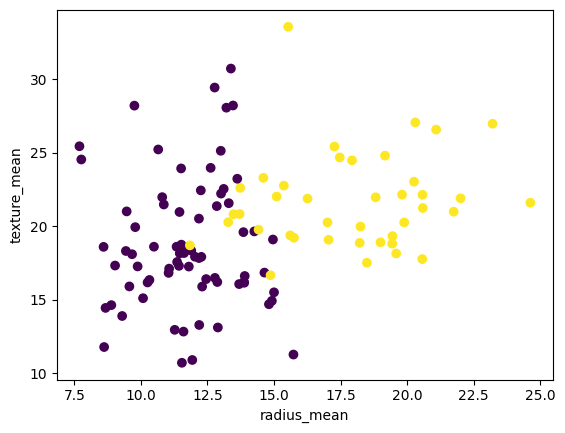

In [164]:
# plot scatter plot and decision boundary
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test)
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])
plt.show()

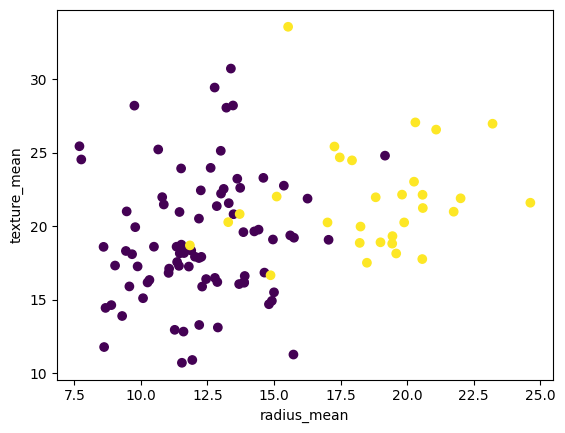

In [165]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_pred)
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])
plt.show()

# Solve AND problem

In [7]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])
weights = np.random.rand(X.shape[1] + 1)
p = Perceptron(weights, bias=1.5, adaption_method='delta')
p.fit(X, y)
y_pred = p.predict(X)

In [8]:
acc = accuracy_score(y, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.25
